In [73]:
import pandas as pd
import seaborn as sns
sns.set()
import re
df = pd.read_csv("ssh_results.csv", on_bad_lines="warn")
df.index = pd.to_datetime(df.timestamp)
df = df[df.index > "2023-11-20 00:00:00"].dropna()
df = df[~df.output.isin(["Error reading SSH protocol banner", "Authentication failed."]) & (~df.output.str.startswith(("Traceback (most recent call last):", "[Errno")))]
df

,IP,time,output,timestamp
timestamp,,,,
2023-11-20 09:53:16.727381,130.216.216.179,10.861981630325317,2023-11-19 20:50:02.835039: I tensorflow/core/...,2023-11-20 09:53:16.727381
2023-11-20 09:53:16.727381,130.216.216.196,10.681195497512817,2023-11-20 09:50:02.676887: I tensorflow/core/...,2023-11-20 09:53:16.727381
2023-11-20 09:53:16.727381,130.216.217.127,10.895159721374512,2023-11-20 09:50:02.766808: I tensorflow/core/...,2023-11-20 09:53:16.727381
2023-11-20 09:53:16.727381,130.216.216.117,10.968265295028687,2023-11-20 09:50:02.966966: I tensorflow/core/...,2023-11-20 09:53:16.727381
2023-11-20 09:53:16.727381,130.216.217.118,194.64953422546387,2023-11-19 20:50:02.977008: I tensorflow/core/...,2023-11-20 09:53:16.727381
...,...,...,...,...
2023-11-20 12:48:16.676544,130.216.216.179,10.874034404754639,2023-11-19 23:45:02.696907: I tensorflow/core/...,2023-11-20 12:48:16.676544
2023-11-20 12:48:16.676544,130.216.216.196,10.683321237564087,2023-11-20 12:45:02.530449: I tensorflow/core/...,2023-11-20 12:48:16.676544
2023-11-20 12:48:16.676544,130.216.217.127,10.883278846740723,2023-11-20 12:45:02.623153: I tensorflow/core/...,2023-11-20 12:48:16.676544


In [74]:
# Extract some metrics from the output
def parse_time_to_seconds(time_str):
    minutes, seconds = map(float, time_str.split('m'))
    return minutes * 60 + seconds
df["nvidia-smi_time"] = df.output.str.extract(r'real\s+(.+)s')[0].apply(parse_time_to_seconds)
df["tf_devices_time"] = df.output.str.extract(r'Took (\d+)s').astype(int)
df["serials"] = df.output.str.findall(r'Serial Number\s*:\s*([^:]+)\n').apply(lambda s: ", ".join(s))
df["product names"] = df.output.str.findall("^    Product Name\s*:\s*([^:]+)$", re.MULTILINE).apply(lambda s: ", ".join(s))
df["bitshift"] = (df["product names"] == "Unknown Error")
df["persistence"] = df.output.str.extract(r'Persistence Mode\s*:\s*(.+)\n')
df["tf_detected_GPUs"] = df.output.str.findall(r"physical_device:(GPU:\d)', device_type='GPU'").str.len()
df

,IP,time,output,timestamp,nvidia-smi_time,tf_devices_time,serials,product names,bitshift,persistence,tf_detected_GPUs
timestamp,,,,,,,,,,,
2023-11-20 09:53:16.727381,130.216.216.179,10.861981630325317,2023-11-19 20:50:02.835039: I tensorflow/core/...,2023-11-20 09:53:16.727381,0.120,0,1322122007252,NVIDIA A100 80GB PCIe,False,Enabled,1
2023-11-20 09:53:16.727381,130.216.216.196,10.681195497512817,2023-11-20 09:50:02.676887: I tensorflow/core/...,2023-11-20 09:53:16.727381,0.105,0,1652422032676,NVIDIA A100 80GB PCIe,False,Enabled,1
2023-11-20 09:53:16.727381,130.216.217.127,10.895159721374512,2023-11-20 09:50:02.766808: I tensorflow/core/...,2023-11-20 09:53:16.727381,0.232,0,"1652422032681, 1322122007042","NVIDIA A100 80GB PCIe, NVIDIA A100 80GB PCIe",False,Enabled,2
2023-11-20 09:53:16.727381,130.216.216.117,10.968265295028687,2023-11-20 09:50:02.966966: I tensorflow/core/...,2023-11-20 09:53:16.727381,0.266,0,"1323022014403, 1323022014449","NVIDIA A100 80GB PCIe, NVIDIA A100 80GB PCIe",False,Enabled,2
2023-11-20 09:53:16.727381,130.216.217.118,194.64953422546387,2023-11-19 20:50:02.977008: I tensorflow/core/...,2023-11-20 09:53:16.727381,183.834,192,1323022015019,NVIDIA A100 80GB PCIe,False,Enabled,0
...,...,...,...,...,...,...,...,...,...,...,...
2023-11-20 12:48:16.676544,130.216.216.179,10.874034404754639,2023-11-19 23:45:02.696907: I tensorflow/core/...,2023-11-20 12:48:16.676544,0.117,0,1322122007252,NVIDIA A100 80GB PCIe,False,Enabled,1
2023-11-20 12:48:16.676544,130.216.216.196,10.683321237564087,2023-11-20 12:45:02.530449: I tensorflow/core/...,2023-11-20 12:48:16.676544,0.106,0,1652422032676,NVIDIA A100 80GB PCIe,False,Enabled,1
2023-11-20 12:48:16.676544,130.216.217.127,10.883278846740723,2023-11-20 12:45:02.623153: I tensorflow/core/...,2023-11-20 12:48:16.676544,0.211,0,"1652422032681, 1322122007042","NVIDIA A100 80GB PCIe, NVIDIA A100 80GB PCIe",False,Enabled,2


In [75]:
df[df.serials == "1322822261453"]

,IP,time,output,timestamp,nvidia-smi_time,tf_devices_time,serials,product names,bitshift,persistence,tf_detected_GPUs
timestamp,,,,,,,,,,,
2023-11-20 10:03:16.972912,130.216.216.180,98.17739725112915,2023-11-19 21:00:02.761776: I tensorflow/core/...,2023-11-20 10:03:16.972912,87.577,90,1322822261453,Unknown Error,True,Enabled,0
2023-11-20 10:08:17.053122,130.216.216.180,98.08436512947083,2023-11-19 21:05:02.646366: I tensorflow/core/...,2023-11-20 10:08:17.053122,87.460,90,1322822261453,Unknown Error,True,Enabled,0
2023-11-20 10:13:16.860060,130.216.216.180,98.11737966537476,2023-11-19 21:10:02.748235: I tensorflow/core/...,2023-11-20 10:13:16.860060,87.492,90,1322822261453,Unknown Error,True,Enabled,0
2023-11-20 10:18:16.610717,130.216.216.180,97.94356679916382,2023-11-19 21:15:02.474565: I tensorflow/core/...,2023-11-20 10:18:16.610717,87.357,72,1322822261453,Unknown Error,True,Enabled,0
2023-11-20 10:23:16.671607,130.216.216.180,98.10016965866089,2023-11-19 21:20:02.261269: I tensorflow/core/...,2023-11-20 10:23:16.671607,87.379,96,1322822261453,Unknown Error,True,Enabled,0
2023-11-20 10:28:16.658800,130.216.216.180,97.95539999008179,2023-11-19 21:25:02.310063: I tensorflow/core/...,2023-11-20 10:28:16.658800,87.361,72,1322822261453,Unknown Error,True,Enabled,0
2023-11-20 10:33:16.491552,130.216.216.180,98.09173464775085,2023-11-19 21:30:02.291792: I tensorflow/core/...,2023-11-20 10:33:16.491552,87.498,72,1322822261453,Unknown Error,True,Enabled,0
2023-11-20 10:38:16.363844,130.216.216.180,98.09357261657715,2023-11-19 21:35:02.160439: I tensorflow/core/...,2023-11-20 10:38:16.363844,87.481,90,1322822261453,Unknown Error,True,Enabled,0
2023-11-20 10:43:16.287723,130.216.216.180,97.93451762199402,2023-11-19 21:40:02.062149: I tensorflow/core/...,2023-11-20 10:43:16.287723,87.348,90,1322822261453,Unknown Error,True,Enabled,0


In [76]:
df[df.serials == "1322822261453"].bitshift.value_counts()

True     25
False     4
Name: bitshift, dtype: int64

serials
1322122007252                   Axes(0.125,0.2;0.775x0.68)
1322822261453                   Axes(0.125,0.2;0.775x0.68)
1323022014403, 1323022014449    Axes(0.125,0.2;0.775x0.68)
1323022015019                   Axes(0.125,0.2;0.775x0.68)
1652422032676                   Axes(0.125,0.2;0.775x0.68)
1652422032681, 1322122007042    Axes(0.125,0.2;0.775x0.68)
Name: nvidia-smi_time, dtype: object

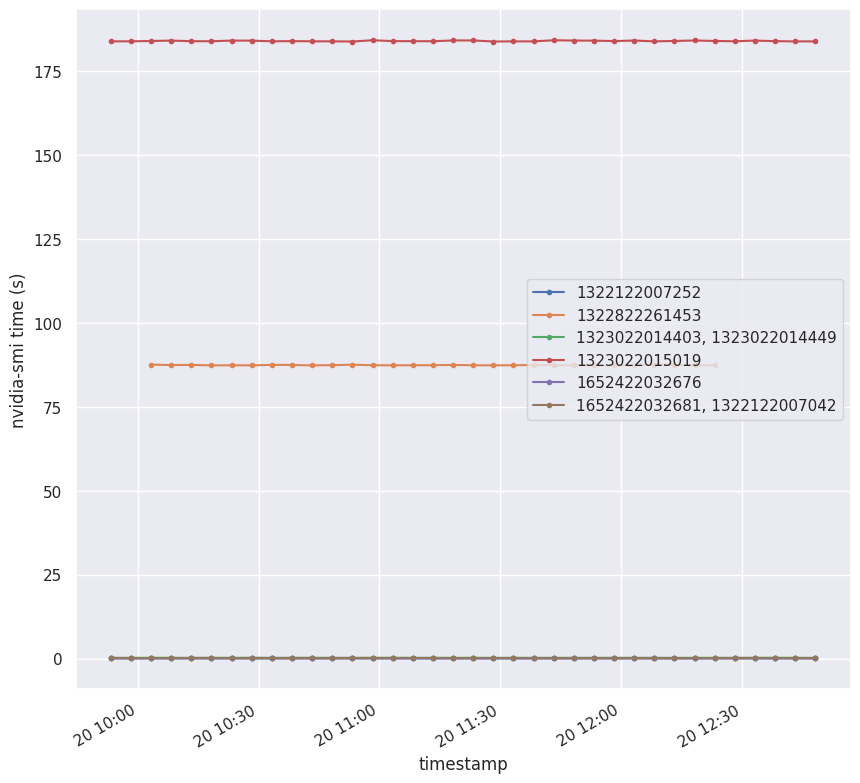

In [77]:
df.groupby("serials")["nvidia-smi_time"].plot(legend=True, figsize=(10,10), style=".-", ylabel="nvidia-smi time (s)")

In [78]:
df.groupby("serials")["nvidia-smi_time"].describe()

,count,mean,std,min,25%,50%,75%,max
serials,,,,,,,,
1322122007252,36.0,0.118944,0.002683,0.112,0.118,0.1190,0.12000,0.127
1322822261453,29.0,87.424103,0.065402,87.344,87.376,87.3980,87.47800,87.577
"1323022014403, 1323022014449",36.0,0.269972,0.004843,0.262,0.267,0.2685,0.27225,0.284
1323022015019,36.0,183.945861,0.117173,183.793,183.853,183.9050,184.06650,184.175
1652422032676,36.0,0.104083,0.004170,0.096,0.102,0.1040,0.10500,0.122
"1652422032681, 1322122007042",36.0,0.216667,0.008642,0.201,0.211,0.2130,0.22550,0.235


In [79]:
df.to_excel("results.xlsx")